In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spambase/spambase_csv.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("/kaggle/input/spambase/spambase_csv.csv")
df.head()
df.shape


(4601, 58)

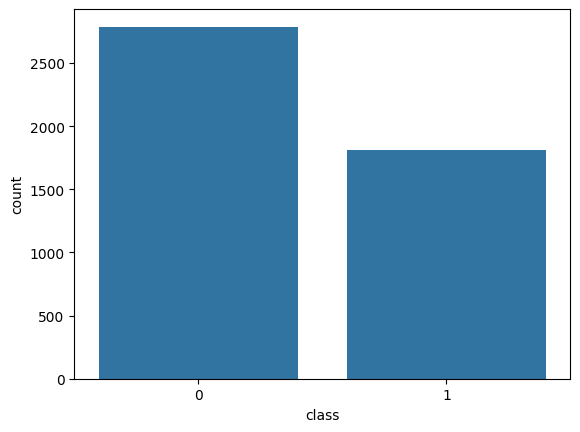

In [4]:
sns.countplot(x='class', data=df)
plt.show()


In [5]:
X = df.drop('class', axis=1)
y = df['class']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [9]:
#option 2
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)   # ❗ no scaling needed


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [10]:
#option 3
svm = SVC(kernel='rbf', C=2, gamma='scale')
svm.fit(X_train_scaled, y_train)


SVC(C=2)

In [11]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.show()


Accuracy: 0.9294245385450597
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



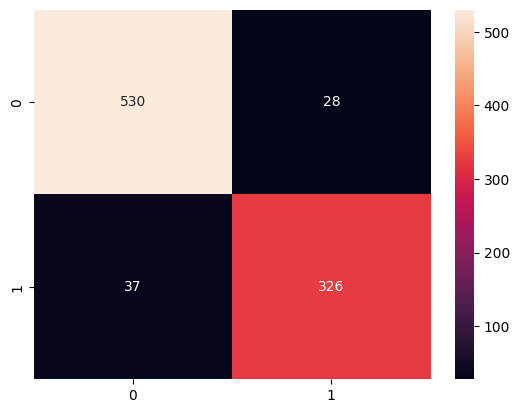

Accuracy: 0.9457111834961998
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       558
           1       0.95      0.91      0.93       363

    accuracy                           0.95       921
   macro avg       0.95      0.94      0.94       921
weighted avg       0.95      0.95      0.95       921



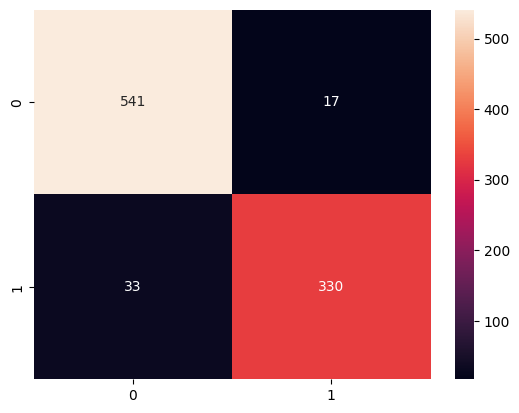

Accuracy: 0.9283387622149837
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       558
           1       0.93      0.88      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



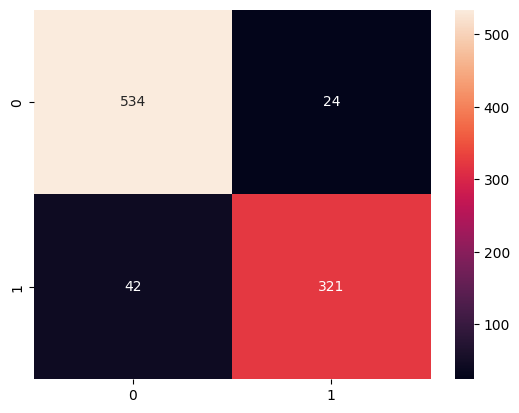

In [12]:
evaluate(lr, X_test_scaled, y_test)
evaluate(rf, X_test, y_test)
evaluate(svm, X_test_scaled, y_test)
